In [35]:
import pandas as pd
from sqlalchemy import create_engine, text, inspect
from pathlib import Path

# 连接到数据库
db_path = Path("../../input_database.db").resolve()
engine = create_engine(f"sqlite:///{db_path}", echo=False)

# 获取项目列表
with engine.connect() as conn:
    projects = pd.read_sql("SELECT project_id, project_name FROM projects ORDER BY project_id", conn)
    
print("数据库中的项目：")
print(projects)
print("\n" + "="*80)


数据库中的项目：
   project_id  project_name
0           1  Rapla_Stage1



In [39]:
project_id = 1  # 我们只有1
solution_table_name = f"solution_schedule_{project_id}"

In [42]:
# 查看所有可用的版本ID
inspector = inspect(engine)
if solution_table_name in inspector.get_table_names():
    columns = [col['name'] for col in inspector.get_columns(solution_table_name)]
    if 'version_id' in columns:
        with engine.connect() as conn:
            versions_query = f'''
                SELECT DISTINCT version_id, COUNT(*) as count 
                FROM "{solution_table_name}" 
                GROUP BY version_id 
                ORDER BY version_id
            '''
            versions_df = pd.read_sql(versions_query, conn)
            print("可用的版本ID：")
            print(versions_df)
            print("\n提示：使用 print_solution_table(version_id=数字) 来查询特定版本")
            print("例如：print_solution_table(version_id=1)")
    else:
        print("该表没有 version_id 列")
else:
    print(f"表 {solution_table_name} 不存在")


可用的版本ID：
   version_id  count
0           1     25
1           2     25

提示：使用 print_solution_table(version_id=数字) 来查询特定版本
例如：print_solution_table(version_id=1)


In [40]:
# 1. 查询 solution_table (solution_schedule_{project_id})

def print_solution_table(version_id=None, engine=engine):
    """
    查询并显示 solution_table 的数据
    
    参数:
        version_id: 如果为 None，则查询最新版本（或所有数据如果没有version_id列）
                   如果指定了version_id，则查询该特定版本
        engine: 数据库引擎
    """
    inspector = inspect(engine)
    if solution_table_name in inspector.get_table_names():
        with engine.connect() as conn:
            # 检查是否有 version_id 列
            columns = [col['name'] for col in inspector.get_columns(solution_table_name)]
            if 'version_id' in columns:
                if version_id is None:
                    # 查询最新版本
                    query = f'''
                        SELECT * FROM "{solution_table_name}"
                        WHERE version_id IS NULL 
                           OR version_id = (SELECT MAX(version_id) FROM "{solution_table_name}" WHERE version_id IS NOT NULL)
                    '''
                else:
                    # 查询特定版本
                    query = f'''
                        SELECT * FROM "{solution_table_name}"
                        WHERE version_id = {version_id}
                    '''
            else:
                # 没有version_id列，查询所有数据
                query = f'SELECT * FROM "{solution_table_name}"'
            
            solution_df = pd.read_sql(query, conn)
        
        print(f"\n【Solution Table】: {solution_table_name}")
        if version_id is not None:
            print(f"查询版本: {version_id}")
        else:
            print("查询版本: 最新版本")
        print(f"总行数: {len(solution_df)}")
        print(f"列数: {len(solution_df.columns)}")
        print("\n列名:", list(solution_df.columns))
        print("\n前10行数据：")
        print(solution_df.head(10))
        print("\n数据形状:", solution_df.shape)
        print("\n" + "="*80)
        return solution_df
    else:
        print(f"\n【Solution Table】: {solution_table_name} 不存在")
        print("="*80)
        return None


In [43]:
solution_df = print_solution_table(version_id=1)


【Solution Table】: solution_schedule_1
查询版本: 1
总行数: 25
列数: 15

列名: ['Module_ID', 'Module_Index', 'Installation_Start', 'Installation_Finish', 'Installation_Duration', 'Arrival_Time', 'Production_Start', 'Production_Duration', 'Factory_Wait_Start', 'Factory_Wait_Duration', 'Onsite_Wait_Start', 'Onsite_Wait_Duration', 'Transport_Start', 'Transport_Duration', 'version_id']

前10行数据：
  Module_ID  Module_Index  Installation_Start  Installation_Finish  \
0  VS-02-31             1                  36                   38   
1  VS-02-22             2                   4                    7   
2  VS-02-21             3                   4                    4   
3   VS-01-2             4                  12                   14   
4   VS-01-8             5                   9                   11   
5  VS-02-29             6                   5                    8   
6  VS-02-92             7                   9                    9   
7   VS-01-3             8                  22             

In [81]:
solution_df_0 = print_solution_table(version_id=1)


【Solution Table】: solution_schedule_1
查询版本: 1
总行数: 25
列数: 15

列名: ['Module_ID', 'Module_Index', 'Installation_Start', 'Installation_Finish', 'Installation_Duration', 'Arrival_Time', 'Production_Start', 'Production_Duration', 'Factory_Wait_Start', 'Factory_Wait_Duration', 'Onsite_Wait_Start', 'Onsite_Wait_Duration', 'Transport_Start', 'Transport_Duration', 'version_id']

前10行数据：
  Module_ID  Module_Index  Installation_Start  Installation_Finish  \
0  VS-02-31             1                  35                   37   
1  VS-02-22             2                   4                    7   
2  VS-02-21             3                   4                    4   
3   VS-01-2             4                   9                   11   
4   VS-01-8             5                  12                   14   
5  VS-02-29             6                   5                    8   
6  VS-02-92             7                   9                    9   
7   VS-01-3             8                  31             

In [56]:
solution_df_1 = print_solution_table(version_id=2)


【Solution Table】: solution_schedule_1
查询版本: 2
总行数: 25
列数: 15

列名: ['Module_ID', 'Module_Index', 'Installation_Start', 'Installation_Finish', 'Installation_Duration', 'Arrival_Time', 'Production_Start', 'Production_Duration', 'Factory_Wait_Start', 'Factory_Wait_Duration', 'Onsite_Wait_Start', 'Onsite_Wait_Duration', 'Transport_Start', 'Transport_Duration', 'version_id']

前10行数据：
  Module_ID  Module_Index  Installation_Start  Installation_Finish  \
0  VS-02-31             1                  37                   39   
1  VS-02-22             2                   4                    7   
2  VS-02-21             3                   4                    4   
3   VS-01-2             4                   9                   11   
4   VS-01-8             5                  12                   14   
5  VS-02-29             6                   5                    8   
6  VS-02-92             7                   9                    9   
7   VS-01-3             8                  33             

In [61]:
solution_df_2 = print_solution_table(version_id=3)


【Solution Table】: solution_schedule_1
查询版本: 3
总行数: 25
列数: 15

列名: ['Module_ID', 'Module_Index', 'Installation_Start', 'Installation_Finish', 'Installation_Duration', 'Arrival_Time', 'Production_Start', 'Production_Duration', 'Factory_Wait_Start', 'Factory_Wait_Duration', 'Onsite_Wait_Start', 'Onsite_Wait_Duration', 'Transport_Start', 'Transport_Duration', 'version_id']

前10行数据：
  Module_ID  Module_Index  Installation_Start  Installation_Finish  \
0  VS-02-31             1                  36                   38   
1  VS-02-22             2                   4                    7   
2  VS-02-21             3                   4                    4   
3   VS-01-2             4                   9                   11   
4   VS-01-8             5                  12                   14   
5  VS-02-29             6                   5                    8   
6  VS-02-92             7                   9                    9   
7   VS-01-3             8                  18             

In [92]:
solution_df_3 = print_solution_table(version_id=4)


【Solution Table】: solution_schedule_1
查询版本: 4
总行数: 25
列数: 15

列名: ['Module_ID', 'Module_Index', 'Installation_Start', 'Installation_Finish', 'Installation_Duration', 'Arrival_Time', 'Production_Start', 'Production_Duration', 'Factory_Wait_Start', 'Factory_Wait_Duration', 'Onsite_Wait_Start', 'Onsite_Wait_Duration', 'Transport_Start', 'Transport_Duration', 'version_id']

前10行数据：
  Module_ID  Module_Index  Installation_Start  Installation_Finish  \
0  VS-02-31             1                  37                   39   
1  VS-02-22             2                   4                    7   
2  VS-02-21             3                   4                    4   
3   VS-01-2             4                   9                   11   
4   VS-01-8             5                  12                   14   
5  VS-02-29             6                   5                    8   
6  VS-02-92             7                   9                    9   
7   VS-01-3             8                  28             

In [57]:
# 2. 查询 summary_table (optimization_summary_{project_id})
summary_table_name = f"optimization_summary_{project_id}"

def print_summary_table(version_id=None, engine=engine):
    inspector = inspect(engine)
    if summary_table_name in inspector.get_table_names():
        with engine.connect() as conn:
            columns = [col['name'] for col in inspector.get_columns(summary_table_name)]
            if 'version_id' in columns:
                if version_id is None:
                    # 查询最新版本
                    query = f'''
                        SELECT * FROM "{summary_table_name}"
                        WHERE version_id IS NULL 
                        OR version_id = (SELECT MAX(version_id) FROM "{summary_table_name}" WHERE version_id IS NOT NULL)
                    '''
                else:
                    # 查询特定版本
                    query = f'''
                        SELECT * FROM "{summary_table_name}"
                        WHERE version_id = {version_id}
                    '''
            else:
                query = f'SELECT * FROM "{summary_table_name}"'
            
            summary_df = pd.read_sql(query, conn)
    
    print(f"\n【Summary Table】: {summary_table_name}")
    print(f"总行数: {len(summary_df)}")
    print(f"列数: {len(summary_df.columns)}")
    print("\n列名:", list(summary_df.columns))
    print("\n所有数据：")
    print(summary_df)
    print("\n" + "="*80)



In [78]:
summary_df_0 = print_summary_table(version_id=1)


【Summary Table】: optimization_summary_1
总行数: 1
列数: 7

列名: ['project_id', 'version_id', 'objective_value', 'status', 'project_finish_time', 'num_orders', 'order_times']

所有数据：
   project_id  version_id  objective_value  status  project_finish_time  \
0           1           1             24.2       2                   42   

   num_orders                     order_times  
0          11  4,9,12,15,18,22,26,27,31,35,38  



In [58]:
summary_df_1 = print_summary_table(version_id=2)


【Summary Table】: optimization_summary_1
总行数: 1
列数: 7

列名: ['project_id', 'version_id', 'objective_value', 'status', 'project_finish_time', 'num_orders', 'order_times']

所有数据：
   project_id  version_id  objective_value  status  project_finish_time  \
0           1           2             29.1       9                   40   

   num_orders                     order_times  
0          11  4,9,12,15,18,22,26,28,32,33,37  



In [62]:
summary_df_2 = print_summary_table(version_id=3)


【Summary Table】: optimization_summary_1
总行数: 1
列数: 7

列名: ['project_id', 'version_id', 'objective_value', 'status', 'project_finish_time', 'num_orders', 'order_times']

所有数据：
   project_id  version_id  objective_value  status  project_finish_time  \
0           1           3            29.35       9                   40   

   num_orders                  order_times  
0          10  4,9,12,15,18,22,26,30,32,36  



In [77]:
summary_df_3 = print_summary_table(version_id=4)


【Summary Table】: optimization_summary_1
总行数: 1
列数: 7

列名: ['project_id', 'version_id', 'objective_value', 'status', 'project_finish_time', 'num_orders', 'order_times']

所有数据：
   project_id  version_id  objective_value  status  project_finish_time  \
0           1           4             29.5       9                   40   

   num_orders                     order_times  
0          11  4,9,12,15,18,22,26,28,29,33,37  



In [76]:
# 3. 查询 delay_update_records (delay_updates_{project_id})
delay_table_name = f"delay_updates_{project_id}"

if delay_table_name in inspector.get_table_names():
    with engine.connect() as conn:
        delay_df = pd.read_sql(f'SELECT * FROM "{delay_table_name}"', conn)
    
    print(f"\n【Delay Update Records】: {delay_table_name}")
    print(f"总行数: {len(delay_df)}")
    print(f"列数: {len(delay_df.columns)}")
    print("\n列名:", list(delay_df.columns))
    print("\n所有延迟记录：")
    print(delay_df)
    print("\n" + "="*80)
else:
    print(f"\n【Delay Update Records】: {delay_table_name} 不存在")
    print("="*80)



【Delay Update Records】: delay_updates_1
总行数: 6
列数: 10

列名: ['delay_id', 'module_id', 'delay_type', 'phase', 'delay_hours', 'detected_at_time', 'detected_at_datetime', 'reason', 'created_at', 'version_id']

所有延迟记录：
   delay_id  module_id          delay_type         phase  delay_hours  \
0         1   VS-02-58  DURATION_EXTENSION     TRANSPORT          2.0   
1         2  VS-02-105  START_POSTPONEMENT   FABRICATION          3.0   
2         3   KSS-02-1  START_POSTPONEMENT  INSTALLATION          3.0   
3         4   KSS-02-2  DURATION_EXTENSION   FABRICATION          3.0   
4         5   KSS-01-5  DURATION_EXTENSION     TRANSPORT         12.0   
5         6  KSS-01-11  START_POSTPONEMENT  INSTALLATION          8.0   

   detected_at_time detected_at_datetime reason           created_at  \
0                12  2026-01-13 10:19:27   None  2026-01-13 09:19:30   
1                12  2026-01-13 10:19:36   None  2026-01-13 09:19:45   
2                12  2026-01-13 10:22:44   None  2026-01-

In [ ]:
# 可复用的函数：从 solution_df 绘制完整的 Gantt 图（包含所有阶段）
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


def plot_gantt_from_solution_df(df, sort_by="Production_Start", ascending=True, ax=None):
    """从给定的 solution DataFrame 绘制完整的 Gantt 图，显示所有阶段。
    
    参数
    ------
    df : pd.DataFrame
        包含所有时间阶段列的 DataFrame（直接从数据库读取的 solution_df）
    sort_by : str
        排序列名，默认 "Installation_Start"
    ascending : bool
        排序方向，默认 False（降序）
    ax : matplotlib.axes.Axes or None
        可选的坐标轴对象
        
    返回
    ------
    final_time : float or int
        最终完工时间
    ax : matplotlib.axes.Axes
        绘图使用的坐标轴对象
    """
    # 直接读取df的列
    required_cols = ['Module_ID', 'Production_Start', 'Production_Duration',
                     'Factory_Wait_Start', 'Factory_Wait_Duration',
                     'Transport_Start', 'Transport_Duration',
                     'Onsite_Wait_Start', 'Onsite_Wait_Duration',
                     'Installation_Start', 'Installation_Duration', 'Installation_Finish']
    
    missing = set(required_cols) - set(df.columns)
    if missing:
        raise RuntimeError(f"DataFrame 缺少必需的列: {missing}")

    # 排序
    df_plot = df.sort_values(by=sort_by, ascending=ascending).reset_index(drop=True)

    # 准备坐标轴
    if ax is None:
        fig, ax = plt.subplots(figsize=(14, max(8, len(df_plot) * 0.4)))
    else:
        fig = ax.figure

    # 定义各阶段的颜色
    colors = {
        'Production': '#3498db',      # 蓝色
        'Factory_Wait': '#f39c12',    # 橙色
        'Transport': '#9b59b6',       # 紫色
        'Onsite_Wait': '#e74c3c',     # 红色
        'Installation': '#2ecc71'     # 绿色
    }

    y_positions = range(len(df_plot))
    
    # 为每个模块绘制所有阶段
    for y, (_, row) in enumerate(df_plot.iterrows()):
        y_pos = y
        
        # 1. Production 阶段
        # 所有阶段统一左移 1 个时间单位，使离散时间索引与条形对齐
        if pd.notna(row['Production_Start']) and row['Production_Duration'] > 0:
            ax.barh(y_pos, row['Production_Duration'], 
                   left=row['Production_Start'] - 1, 
                   height=0.5, align='center', 
                   color=colors['Production'], label='Production' if y == 0 else '')
        
        # 2. Factory Storage (Factory Wait) 阶段
        if pd.notna(row['Factory_Wait_Start']) and row['Factory_Wait_Duration'] > 0:
            ax.barh(y_pos, row['Factory_Wait_Duration'], 
                   left=row['Factory_Wait_Start'] - 1, 
                   height=0.5, align='center', 
                   color=colors['Factory_Wait'], label='Factory Storage Time' if y == 0 else '')
        
        # 3. Transport 阶段
        if pd.notna(row['Transport_Start']) and row['Transport_Duration'] > 0:
            ax.barh(y_pos, row['Transport_Duration'], 
                   left=row['Transport_Start'] - 1, 
                   height=0.5, align='center', 
                   color=colors['Transport'], label='Transport' if y == 0 else '')
        
        # 4. Onsite Storage (Onsite Wait) 阶段
        if pd.notna(row['Onsite_Wait_Start']) and row['Onsite_Wait_Duration'] > 0:
            ax.barh(y_pos, row['Onsite_Wait_Duration'], 
                   left=row['Onsite_Wait_Start'] - 1, 
                   height=0.5, align='center', 
                   color=colors['Onsite_Wait'], label='Onsite Storage Time' if y == 0 else '')
        
        # 5. Installation 阶段
        if pd.notna(row['Installation_Start']) and row['Installation_Duration'] > 0:
            ax.barh(y_pos, row['Installation_Duration'], 
                   left=row['Installation_Start'] - 1, 
                   height=0.5, align='center', 
                   color=colors['Installation'], label='Installation' if y == 0 else '')

    # y 轴标签
    ax.set_yticks(list(y_positions))
    ax.set_yticklabels(df_plot['Module_ID'])

    ax.set_xlabel("Time (hours)")
    ax.set_ylabel("Module ID")
    ax.set_title("Complete Gantt Chart - All Phases")
    ax.invert_yaxis()
    ax.grid(axis="x", linestyle="--", alpha=0.4)

    # 计算最终时间（所有模块安装完成的最大结束时间）
    final_time = df_plot['Installation_Finish'].max()
    ax.axvline(final_time, color="black", linestyle="--", linewidth=2)
    
    # 自定义图例，确保所有阶段（含两个 storage time）都显示
    legend_elements = [
        Line2D([0], [0], color='black', linestyle='--', linewidth=2, label=f"Final time = {final_time}"),
        Patch(facecolor=colors['Production'], label='Production'),
        Patch(facecolor=colors['Factory_Wait'], label='Factory Storage Time'),
        Patch(facecolor=colors['Transport'], label='Transport'),
        Patch(facecolor=colors['Onsite_Wait'], label='Onsite Storage Time'),
        Patch(facecolor=colors['Installation'], label='Installation'),
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    fig.tight_layout()

    return final_time, ax


(np.int64(39),
 <Axes: title={'center': 'Complete Gantt Chart - All Phases'}, xlabel='Time (hours)', ylabel='Module ID'>)

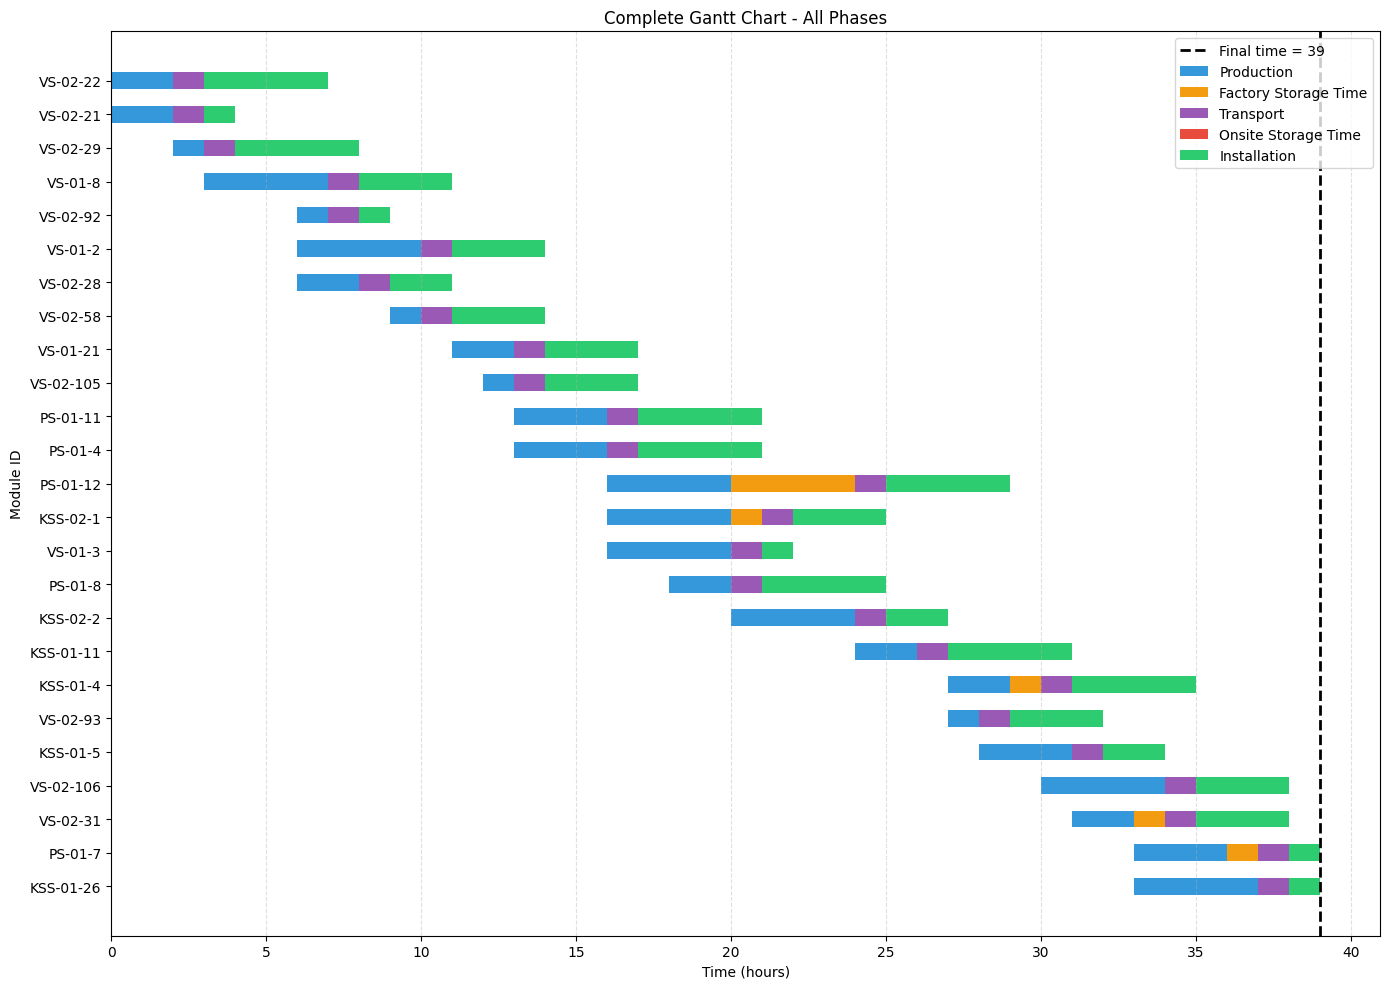

In [73]:
plot_gantt_from_solution_df(solution_df)


(np.int64(41),
 <Axes: title={'center': 'Complete Gantt Chart - All Phases'}, xlabel='Time (hours)', ylabel='Module ID'>)

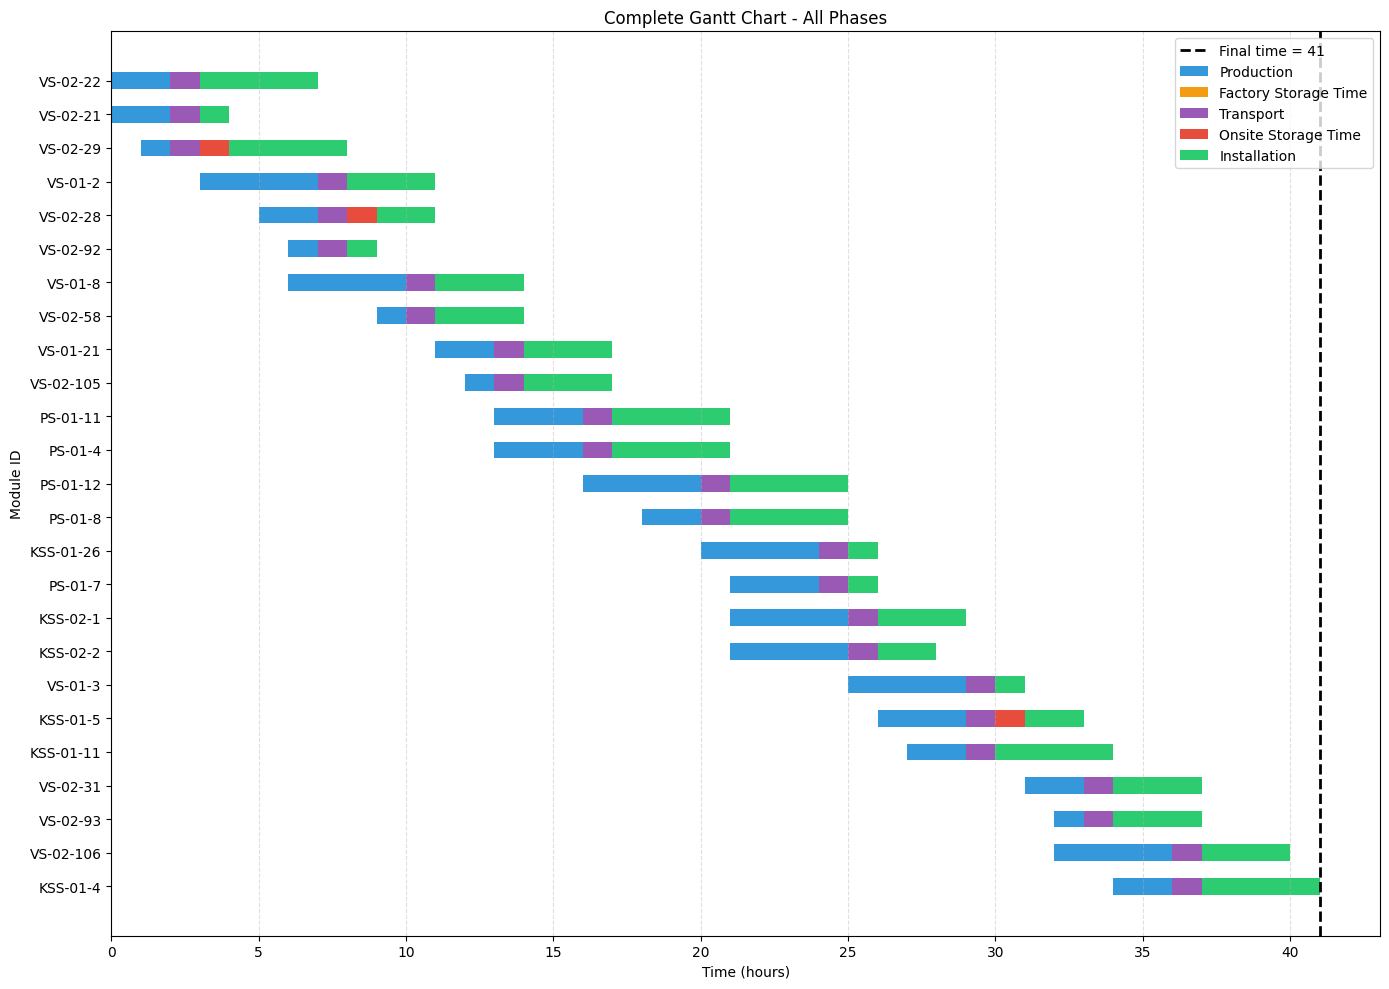

In [82]:
plot_gantt_from_solution_df(solution_df_0)

(np.int64(39),
 <Axes: title={'center': 'Complete Gantt Chart - All Phases'}, xlabel='Time (hours)', ylabel='Module ID'>)

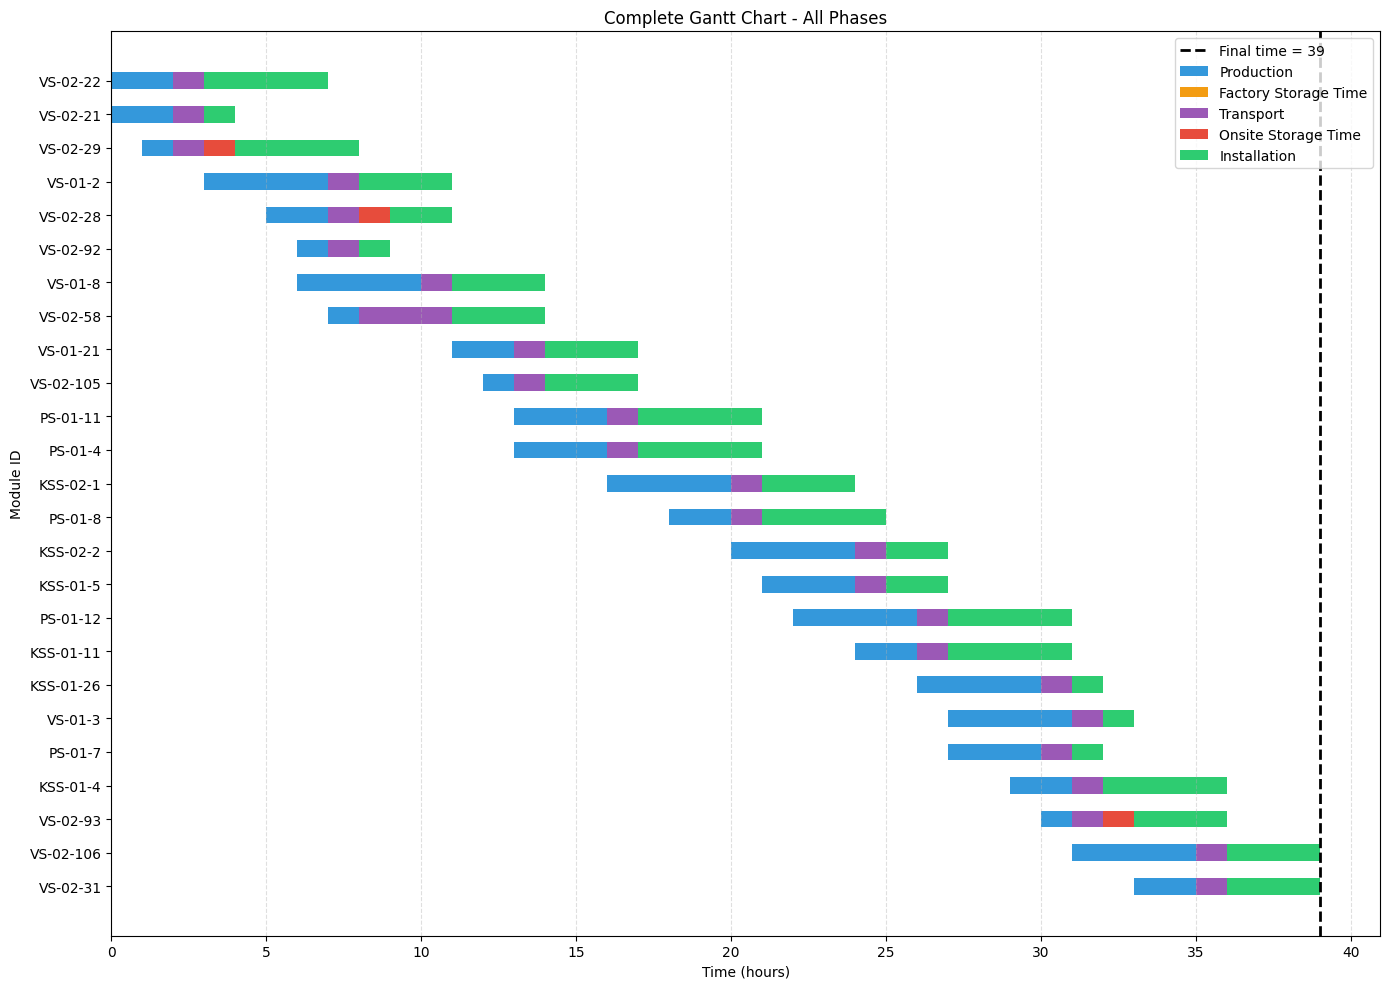

In [74]:
plot_gantt_from_solution_df(solution_df_1)

(np.int64(39),
 <Axes: title={'center': 'Complete Gantt Chart - All Phases'}, xlabel='Time (hours)', ylabel='Module ID'>)

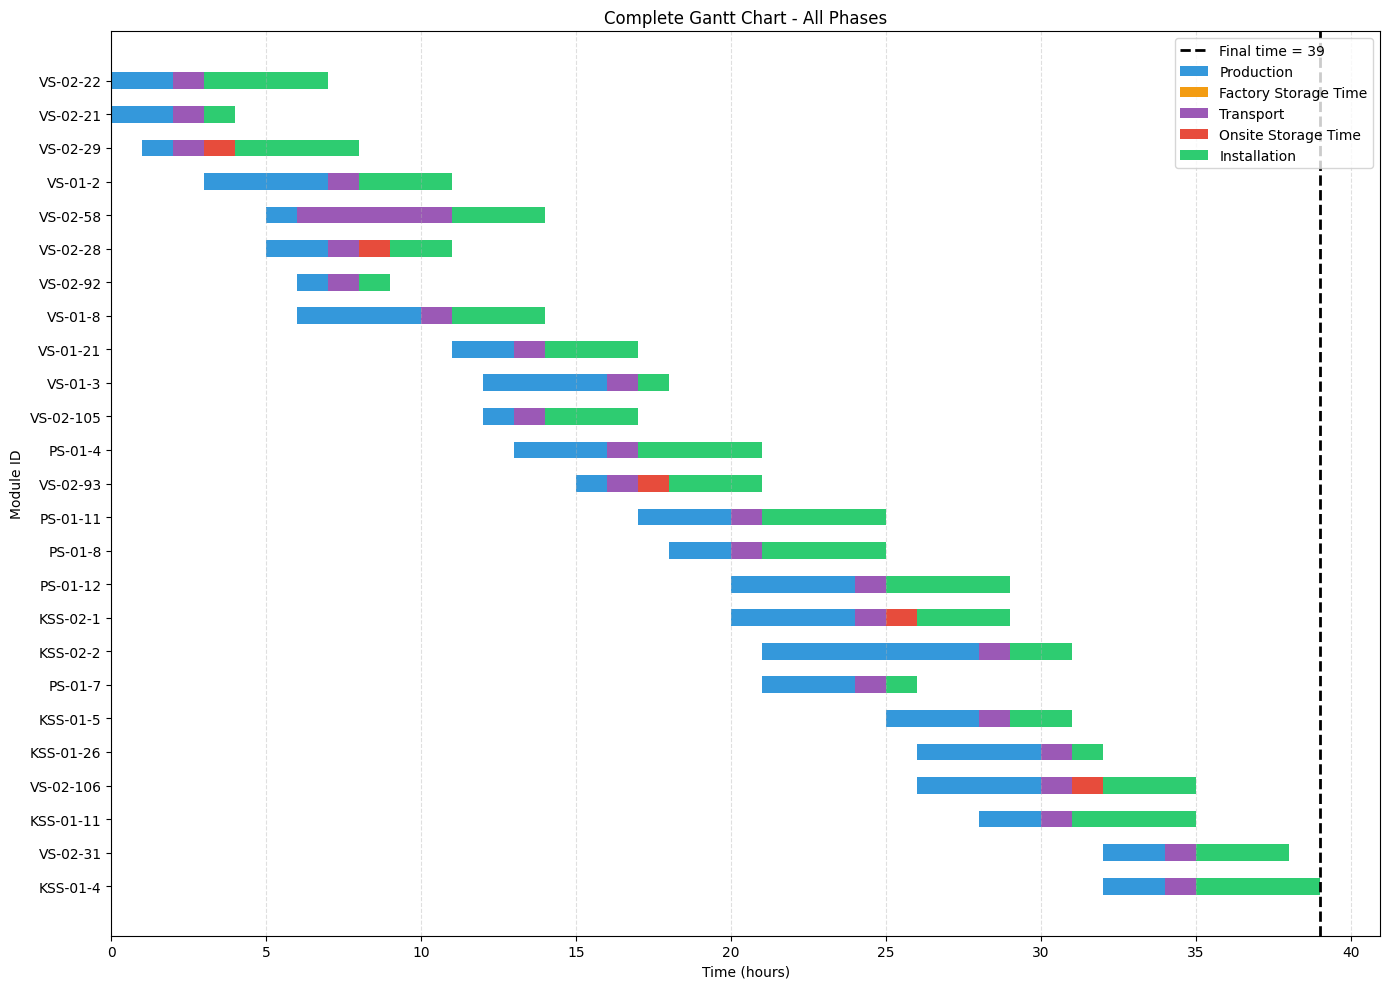

In [75]:
plot_gantt_from_solution_df(solution_df_2)

(np.int64(39),
 <Axes: title={'center': 'Complete Gantt Chart - All Phases'}, xlabel='Time (hours)', ylabel='Module ID'>)

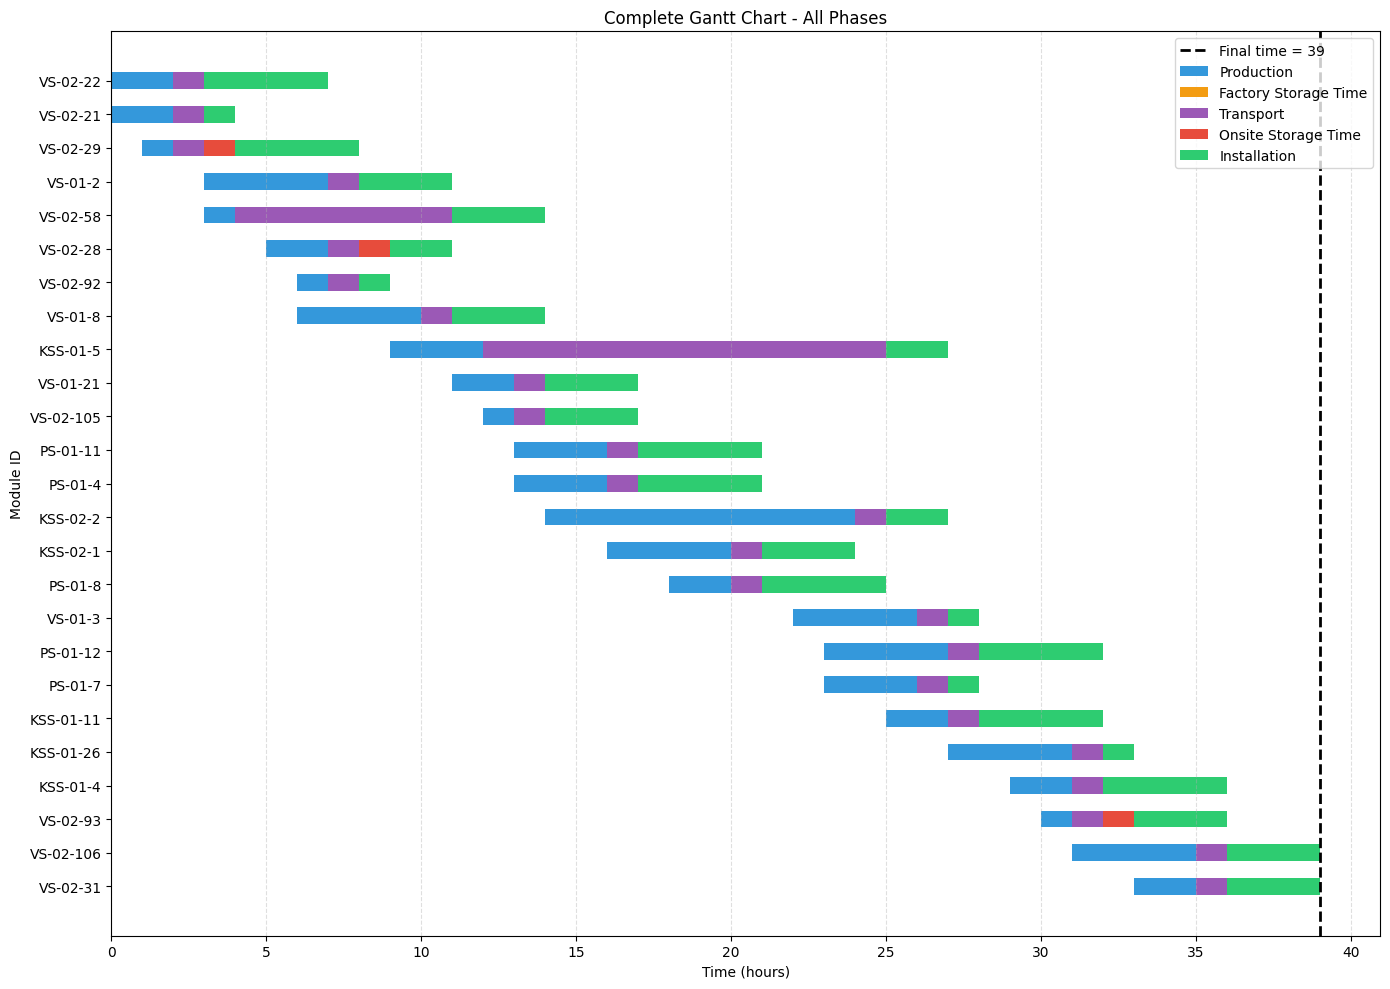

In [93]:
plot_gantt_from_solution_df(solution_df_3)

In [87]:
df = pd.read_csv(r"C:\2025AUTUMN\MT\random_schedule.csv")
precedence = df[['Module_ID', 'Installation Precedence']]

In [88]:
precedence

,Module_ID,Installation Precedence
0,VS-02-31,NaN
1,VS-02-22,NaN
2,VS-02-21,NaN
3,VS-01-2,VS-02-21
4,VS-01-8,VS-02-22
5,VS-02-29,VS-02-21
6,VS-02-92,VS-02-29
7,VS-01-3,VS-02-29
8,VS-01-21,VS-02-29
9,VS-02-28,VS-02-92


In [89]:
# 读取原始数据获取 precedence 关系
raw_table_name = f"raw_schedule_{project_id}"
with engine.connect() as conn:
    raw_df = pd.read_sql(f'SELECT * FROM "{raw_table_name}"', conn)

# 构建 precedence 映射：{module_id: [predecessor_module_ids]}
# 假设 raw_df 有 'Module ID' 和 'Installation Precedence' 列
if 'Installation Precedence' in raw_df.columns:
    precedence_map = {}  # {module_id: [predecessor_ids]}
    module_to_index = {}  # {module_id: module_index}
    
    for _, row in raw_df.iterrows():
        module_id = str(row.get('Module ID', row.get('Module_ID', '')))
        if pd.notna(module_id) and module_id:
            pred_str = str(row.get('Installation Precedence', '')).strip()
            if pd.notna(pred_str) and pred_str and pred_str.lower() != 'none' and pred_str.lower() != 'nan':
                # 可能有多个 predecessor，用逗号分隔
                preds = [p.strip() for p in pred_str.split(',') if p.strip()]
                precedence_map[module_id] = preds
            else:
                precedence_map[module_id] = []
    
    print("Precedence 关系已加载")
    print(f"总模块数: {len(precedence_map)}")
    print(f"有前序的模块数: {sum(1 for preds in precedence_map.values() if preds)}")
else:
    print("警告：raw_schedule 表中没有找到 'Installation Precedence' 列")
    precedence_map = {}


Precedence 关系已加载
总模块数: 25
有前序的模块数: 22


In [96]:
def compute_baseline_schedule(base_solution_df, delay_df, precedence_map):
    """
    计算 baseline schedule：基于原始优化解，应用 delay 并顺延，不考虑资源约束，只保证 precedence。
    
    参数:
        base_solution_df: 基础 solution DataFrame (version_id=1，无 delay)
        delay_df: delay 记录 DataFrame（包含 version_id, module_id, phase, delay_type, delay_hours）
        precedence_map: {module_id: [predecessor_module_ids]} 的字典
    
    返回:
        baseline_df: 应用 delay 后的 baseline schedule DataFrame
    """
    # 复制基础 schedule
    baseline_df = base_solution_df.copy()
    
    # 构建模块索引映射
    module_id_to_idx = {}
    for idx, row in baseline_df.iterrows():
        module_id = str(row['Module_ID'])
        module_id_to_idx[module_id] = idx
    
    # 按模块和阶段聚合 delay
    # delay_by_module_phase: {(module_id, phase): {'start_delay': float, 'dur_delay': float}}
    delay_by_module_phase = {}
    
    for _, delay_row in delay_df.iterrows():
        module_id = str(delay_row['module_id'])
        phase = delay_row['phase']
        delay_type = delay_row['delay_type']
        delay_hours = float(delay_row['delay_hours'])
        
        key = (module_id, phase)
        if key not in delay_by_module_phase:
            delay_by_module_phase[key] = {'start_delay': 0.0, 'dur_delay': 0.0}
        
        if delay_type == 'START_POSTPONEMENT':
            delay_by_module_phase[key]['start_delay'] += delay_hours
        elif delay_type == 'DURATION_EXTENSION':
            delay_by_module_phase[key]['dur_delay'] += delay_hours
    
    # 阶段顺序映射
    phase_order = ['FABRICATION', 'TRANSPORT', 'INSTALLATION']
    phase_to_cols = {
        'FABRICATION': {
            'start': 'Production_Start',
            'dur': 'Production_Duration',
            'finish': None  # Production_Finish = Production_Start + Production_Duration - 1
        },
        'TRANSPORT': {
            'start': 'Transport_Start',
            'dur': 'Transport_Duration',
            'finish': None
        },
        'INSTALLATION': {
            'start': 'Installation_Start',
            'dur': 'Installation_Duration',
            'finish': 'Installation_Finish'
        }
    }
    
    # 第一步：在同一模块内应用 delay（按阶段顺序）
    for module_id, idx in module_id_to_idx.items():
        row = baseline_df.loc[idx]
        
        # 按阶段顺序处理
        cumulative_delay = 0.0  # 累积的延迟，用于顺延后续阶段
        
        for phase in phase_order:
            if (module_id, phase) in delay_by_module_phase:
                delays = delay_by_module_phase[(module_id, phase)]
                cols = phase_to_cols[phase]
                
                # 应用 duration extension
                if delays['dur_delay'] > 0:
                    baseline_df.at[idx, cols['dur']] += delays['dur_delay']
                    # duration 增加也会导致后续阶段顺延
                    cumulative_delay += delays['dur_delay']
                
                # 应用 start postponement
                if delays['start_delay'] > 0:
                    baseline_df.at[idx, cols['start']] += delays['start_delay']
                    cumulative_delay += delays['start_delay']
            
            # 如果有累积延迟，顺延后续阶段
            if cumulative_delay > 0:
                if phase == 'FABRICATION':
                    # 影响后续所有阶段
                    if pd.notna(baseline_df.at[idx, 'Factory_Wait_Start']):
                        baseline_df.at[idx, 'Factory_Wait_Start'] += cumulative_delay
                    if pd.notna(baseline_df.at[idx, 'Transport_Start']):
                        baseline_df.at[idx, 'Transport_Start'] += cumulative_delay
                    if pd.notna(baseline_df.at[idx, 'Onsite_Wait_Start']):
                        baseline_df.at[idx, 'Onsite_Wait_Start'] += cumulative_delay
                    if pd.notna(baseline_df.at[idx, 'Installation_Start']):
                        baseline_df.at[idx, 'Installation_Start'] += cumulative_delay
                elif phase == 'TRANSPORT':
                    # 影响 Onsite_Wait 和 Installation
                    if pd.notna(baseline_df.at[idx, 'Onsite_Wait_Start']):
                        baseline_df.at[idx, 'Onsite_Wait_Start'] += cumulative_delay
                    if pd.notna(baseline_df.at[idx, 'Installation_Start']):
                        baseline_df.at[idx, 'Installation_Start'] += cumulative_delay
                elif phase == 'INSTALLATION':
                    # 只影响 Installation 本身，已在上面处理
                    pass
        
        # 重新计算所有阶段的时间，确保连贯性
        # 1. Production_Finish = Production_Start + Production_Duration - 1
        if pd.notna(baseline_df.at[idx, 'Production_Start']):
            prod_start = baseline_df.at[idx, 'Production_Start']
            prod_dur = baseline_df.at[idx, 'Production_Duration']
            baseline_df.at[idx, 'Production_Finish'] = prod_start + prod_dur - 1
            
            # 2. Factory_Wait_Start = Production_Finish + 1（生产结束后立即开始等待）
            baseline_df.at[idx, 'Factory_Wait_Start'] = baseline_df.at[idx, 'Production_Finish'] + 1
        
        # 3. Transport_Start = Factory_Wait_Start + Factory_Wait_Duration（等待结束后开始运输）
        if pd.notna(baseline_df.at[idx, 'Factory_Wait_Start']):
            factory_wait_start = baseline_df.at[idx, 'Factory_Wait_Start']
            factory_wait_dur = baseline_df.at[idx, 'Factory_Wait_Duration']
            baseline_df.at[idx, 'Transport_Start'] = factory_wait_start + factory_wait_dur
        
        # 4. Arrival_Time = Transport_Start + Transport_Duration（运输结束即到达）
        if pd.notna(baseline_df.at[idx, 'Transport_Start']):
            trans_start = baseline_df.at[idx, 'Transport_Start']
            trans_dur = baseline_df.at[idx, 'Transport_Duration']
            baseline_df.at[idx, 'Arrival_Time'] = trans_start + trans_dur
            
            # 5. Onsite_Wait_Start = Arrival_Time（到达后立即开始等待）
            baseline_df.at[idx, 'Onsite_Wait_Start'] = baseline_df.at[idx, 'Arrival_Time']
        
        # 6. Installation_Start = Onsite_Wait_Start + Onsite_Wait_Duration（等待结束后开始安装）
        if pd.notna(baseline_df.at[idx, 'Onsite_Wait_Start']):
            onsite_wait_start = baseline_df.at[idx, 'Onsite_Wait_Start']
            onsite_wait_dur = baseline_df.at[idx, 'Onsite_Wait_Duration']
            baseline_df.at[idx, 'Installation_Start'] = onsite_wait_start + onsite_wait_dur
        
        # 7. Installation_Finish = Installation_Start + Installation_Duration - 1
        if pd.notna(baseline_df.at[idx, 'Installation_Start']):
            inst_start = baseline_df.at[idx, 'Installation_Start']
            inst_dur = baseline_df.at[idx, 'Installation_Duration']
            baseline_df.at[idx, 'Installation_Finish'] = inst_start + inst_dur - 1
    
    # 第二步：按 precedence 关系传播延迟（拓扑排序）
    # 构建 successor 映射：{module_id: [successor_module_ids]}
    successors_map = {}
    for module_id in module_id_to_idx.keys():
        successors_map[module_id] = []
    
    for module_id, preds in precedence_map.items():
        for pred_id in preds:
            if pred_id in successors_map:
                successors_map[pred_id].append(module_id)
    
    # 拓扑排序：找到所有没有前序的模块作为起点
    visited = set()
    
    def topological_visit(module_id):
        if module_id in visited or module_id not in module_id_to_idx:
            return
        
        visited.add(module_id)
        idx = module_id_to_idx[module_id]
        
        # 检查所有 predecessor 的安装完成时间
        preds = precedence_map.get(module_id, [])
        max_pred_finish = 0
        
        for pred_id in preds:
            if pred_id in module_id_to_idx:
                pred_idx = module_id_to_idx[pred_id]
                pred_finish = baseline_df.at[pred_idx, 'Installation_Finish']
                if pd.notna(pred_finish):
                    max_pred_finish = max(max_pred_finish, int(pred_finish))
        
        # 如果当前模块的安装开始时间 < max_pred_finish + 1，需要顺延
        current_install_start = baseline_df.at[idx, 'Installation_Start']
        if pd.notna(current_install_start) and max_pred_finish > 0:
            required_start = max_pred_finish + 1
            if current_install_start < required_start:
                delay_needed = required_start - current_install_start
                
                # 顺延 Installation_Start，并重新计算前面所有阶段的时间以保持连贯
                baseline_df.at[idx, 'Installation_Start'] = required_start
                baseline_df.at[idx, 'Installation_Finish'] = (
                    required_start + baseline_df.at[idx, 'Installation_Duration'] - 1
                )
                
                # 重新计算 Onsite_Wait_Start（保持 duration 不变）
                onsite_wait_dur = baseline_df.at[idx, 'Onsite_Wait_Duration']
                baseline_df.at[idx, 'Onsite_Wait_Start'] = required_start - onsite_wait_dur
                
                # 重新计算 Arrival_Time
                baseline_df.at[idx, 'Arrival_Time'] = baseline_df.at[idx, 'Onsite_Wait_Start']
                
                # 重新计算 Transport_Start（保持 duration 不变）
                trans_dur = baseline_df.at[idx, 'Transport_Duration']
                baseline_df.at[idx, 'Transport_Start'] = baseline_df.at[idx, 'Arrival_Time'] - trans_dur
                
                # 重新计算 Factory_Wait_Start（保持 duration 不变）
                factory_wait_dur = baseline_df.at[idx, 'Factory_Wait_Duration']
                baseline_df.at[idx, 'Factory_Wait_Start'] = baseline_df.at[idx, 'Transport_Start'] - factory_wait_dur
                
                # 重新计算 Production_Finish
                baseline_df.at[idx, 'Production_Finish'] = baseline_df.at[idx, 'Factory_Wait_Start'] - 1
                
                # 重新计算 Production_Start（保持 duration 不变）
                prod_dur = baseline_df.at[idx, 'Production_Duration']
                baseline_df.at[idx, 'Production_Start'] = baseline_df.at[idx, 'Production_Finish'] - prod_dur + 1
        
        # 访问所有 successor
        for succ_id in successors_map.get(module_id, []):
            topological_visit(succ_id)
    
    # 从所有没有前序的模块开始
    for module_id in module_id_to_idx.keys():
        if not precedence_map.get(module_id, []):
            topological_visit(module_id)
    
    # 处理剩余的模块（处理循环依赖的情况）
    for module_id in module_id_to_idx.keys():
        if module_id not in visited:
            topological_visit(module_id)
    
    return baseline_df


In [91]:
# 读取基础 solution (version_id=1，无 delay)
solution_df_0 = print_solution_table(version_id=1)

# 读取所有 delay 记录
delay_table_name = f"delay_updates_{project_id}"
with engine.connect() as conn:
    all_delays_df = pd.read_sql(f'SELECT * FROM "{delay_table_name}" ORDER BY version_id, delay_id', conn)

print(f"\n所有 delay 记录：")
print(all_delays_df[['delay_id', 'module_id', 'phase', 'delay_type', 'delay_hours', 'version_id']])



【Solution Table】: solution_schedule_1
查询版本: 1
总行数: 25
列数: 15

列名: ['Module_ID', 'Module_Index', 'Installation_Start', 'Installation_Finish', 'Installation_Duration', 'Arrival_Time', 'Production_Start', 'Production_Duration', 'Factory_Wait_Start', 'Factory_Wait_Duration', 'Onsite_Wait_Start', 'Onsite_Wait_Duration', 'Transport_Start', 'Transport_Duration', 'version_id']

前10行数据：
  Module_ID  Module_Index  Installation_Start  Installation_Finish  \
0  VS-02-31             1                  35                   37   
1  VS-02-22             2                   4                    7   
2  VS-02-21             3                   4                    4   
3   VS-01-2             4                   9                   11   
4   VS-01-8             5                  12                   14   
5  VS-02-29             6                   5                    8   
6  VS-02-92             7                   9                    9   
7   VS-01-3             8                  31             

In [98]:
# 计算三个 baseline schedule
# baseline_1: solution_df_0 + delay_2 (version_id=2)
# baseline_2: solution_df_0 + delay_2 + delay_3 (version_id=2,3)
# baseline_3: solution_df_0 + delay_2 + delay_3 + delay_4 (version_id=2,3,4)

delays_v2 = all_delays_df[all_delays_df['version_id'] == 2].copy()
delays_v3 = all_delays_df[all_delays_df['version_id'] == 3].copy()
delays_v4 = all_delays_df[all_delays_df['version_id'] == 4].copy()

print("计算 baseline_1 (叠加 version_id=2 的 delay)...")
baseline_1 = compute_baseline_schedule(solution_df_0, delays_v2, precedence_map)

print("计算 baseline_2 (叠加 version_id=2,3 的 delay)...")
delays_v2_v3 = pd.concat([delays_v2, delays_v3], ignore_index=True)
baseline_2 = compute_baseline_schedule(solution_df_0, delays_v2_v3, precedence_map)

print("计算 baseline_3 (叠加 version_id=2,3,4 的 delay)...")
delays_v2_v3_v4 = pd.concat([delays_v2, delays_v3, delays_v4], ignore_index=True)
baseline_3 = compute_baseline_schedule(solution_df_0, delays_v2_v3_v4, precedence_map)

print("\n计算完成！")
print(f"baseline_1 最终时间: {baseline_1['Installation_Finish'].max()}")
print(f"baseline_2 最终时间: {baseline_2['Installation_Finish'].max()}")
print(f"baseline_3 最终时间: {baseline_3['Installation_Finish'].max()}")
print(f"\n实际优化解对比：")
print(f"solution_df_1 (version_id=2) 最终时间: {solution_df_1['Installation_Finish'].max()}")
print(f"solution_df_2 (version_id=3) 最终时间: {solution_df_2['Installation_Finish'].max()}")
print(f"solution_df_3 (version_id=4) 最终时间: {solution_df_3['Installation_Finish'].max()}")


计算 baseline_1 (叠加 version_id=2 的 delay)...
计算 baseline_2 (叠加 version_id=2,3 的 delay)...
计算 baseline_3 (叠加 version_id=2,3,4 的 delay)...

计算完成！
baseline_1 最终时间: 41
baseline_2 最终时间: 41
baseline_3 最终时间: 45

实际优化解对比：
solution_df_1 (version_id=2) 最终时间: 39
solution_df_2 (version_id=3) 最终时间: 39
solution_df_3 (version_id=4) 最终时间: 39


Baseline 1: solution_df_0 + delay_2


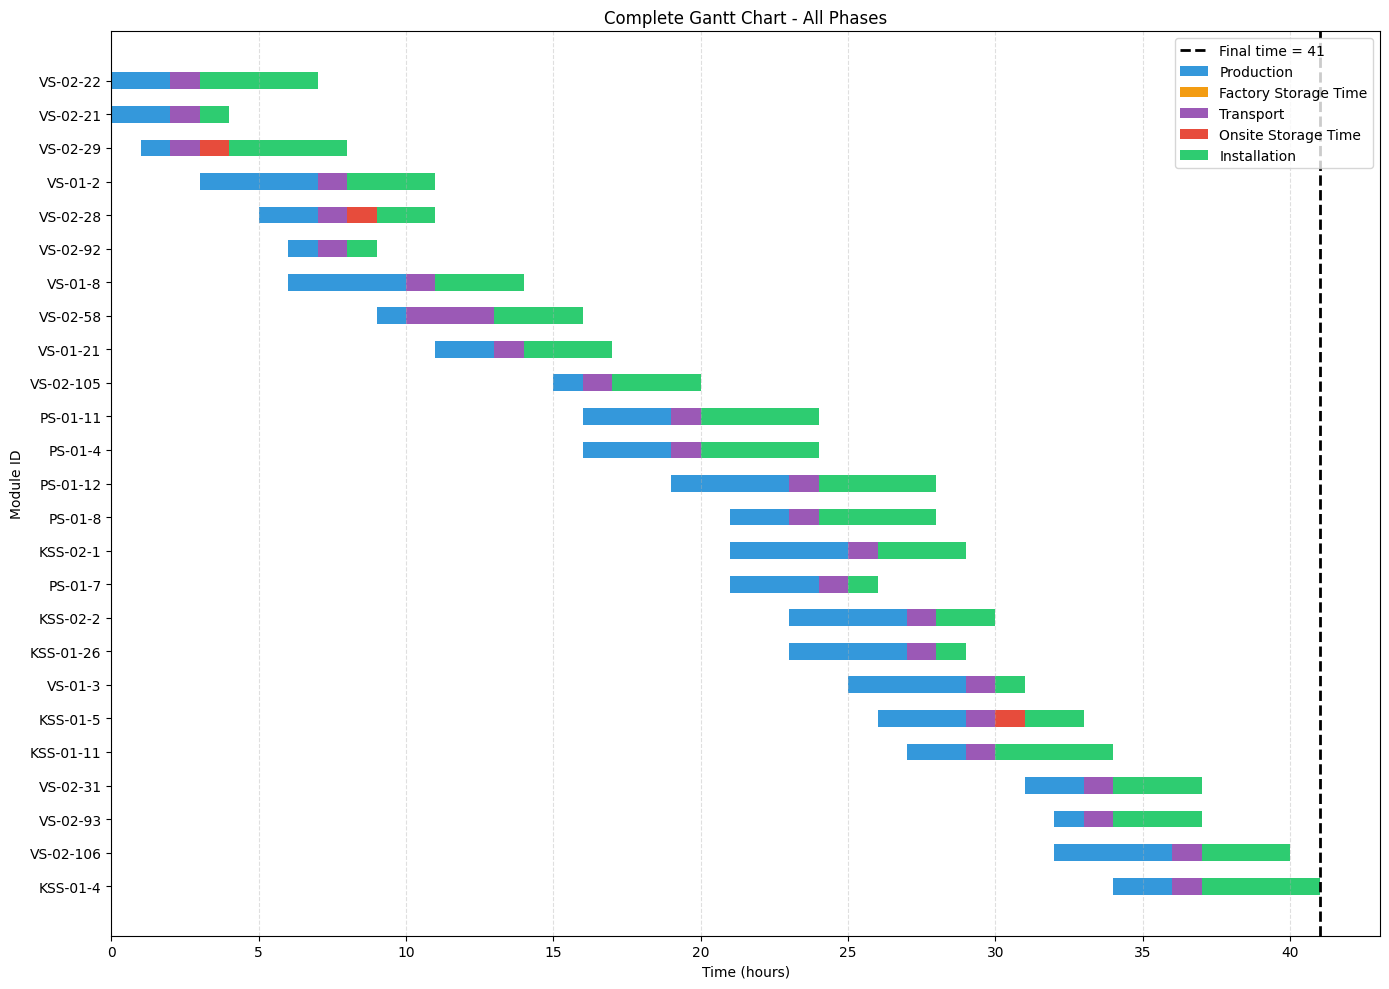


Baseline 2: solution_df_0 + delay_2 + delay_3


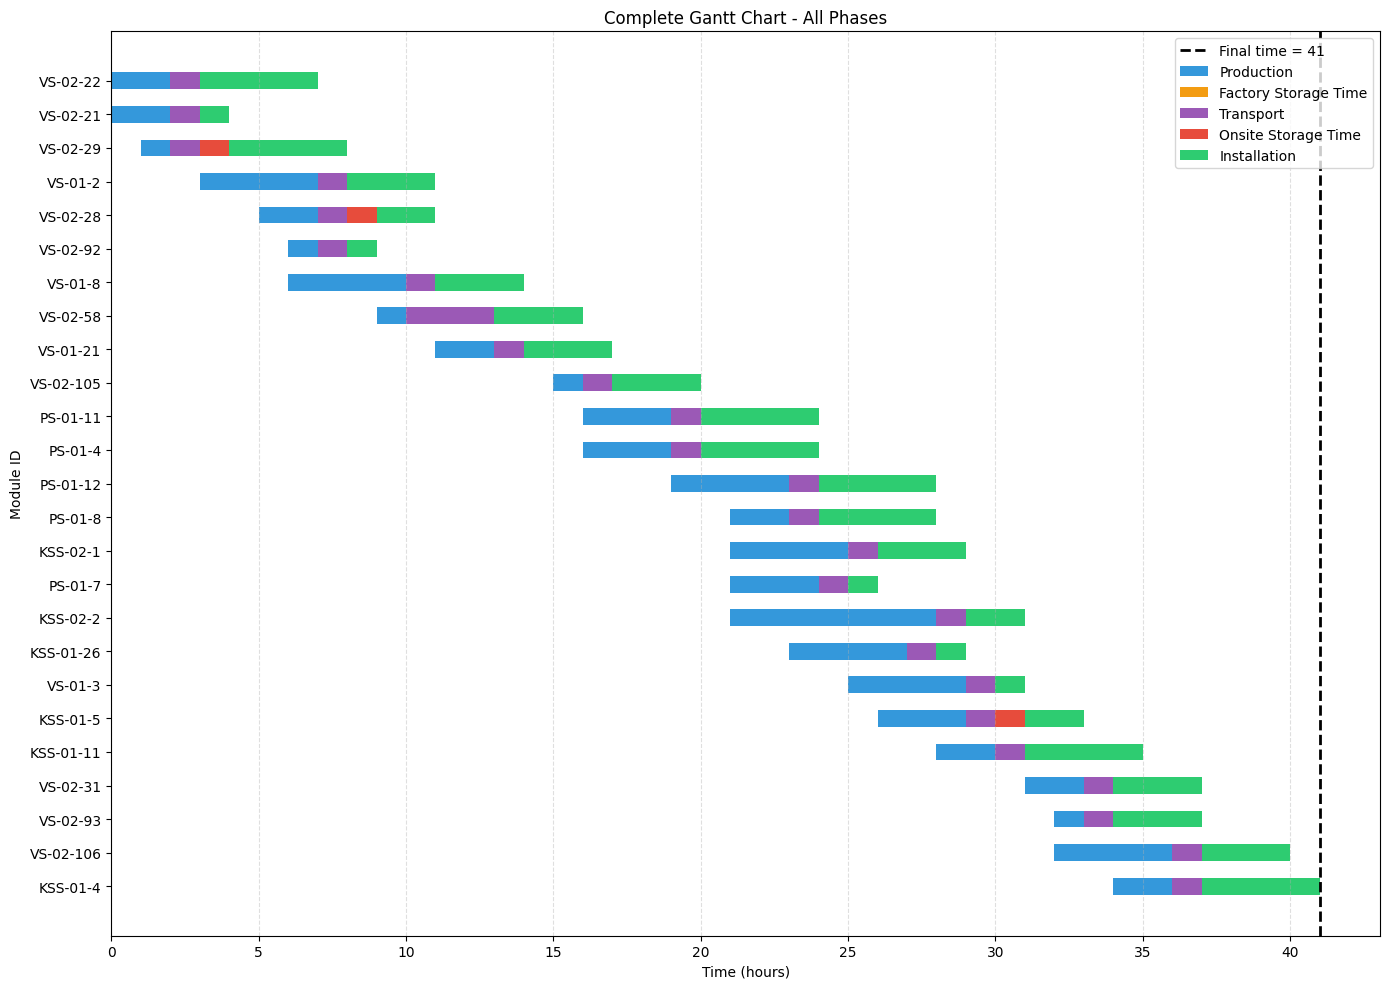


Baseline 3: solution_df_0 + delay_2 + delay_3 + delay_4


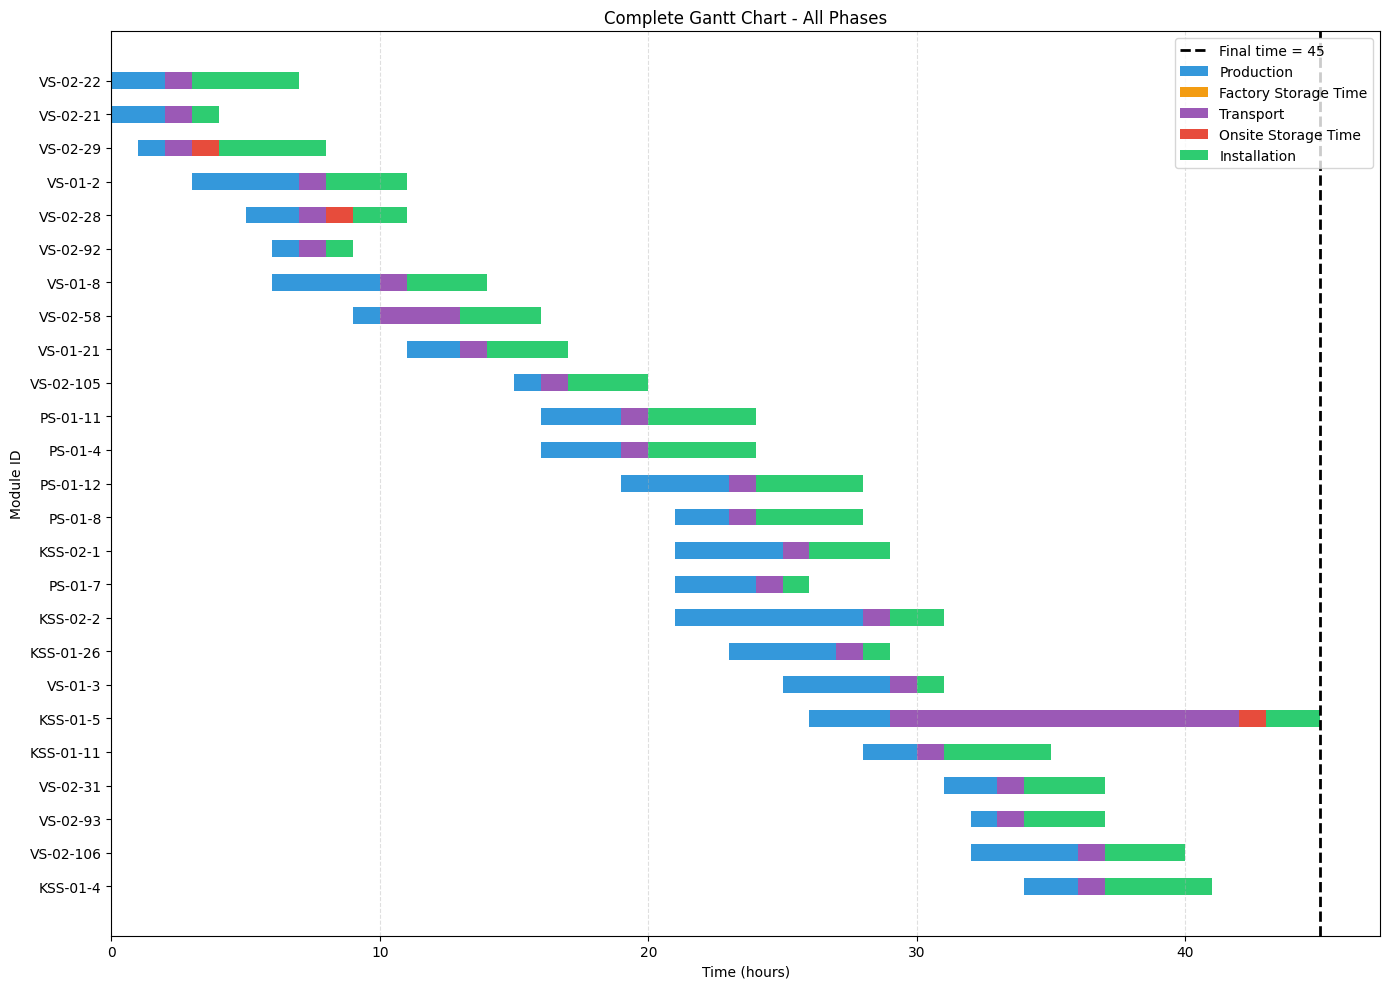

In [100]:
# 绘制三幅 baseline Gantt 图
print("="*80)
print("Baseline 1: solution_df_0 + delay_2")
print("="*80)
final_time_1, ax1 = plot_gantt_from_solution_df(baseline_1, sort_by="Production_Start", ascending=True)
plt.show()

print("\n" + "="*80)
print("Baseline 2: solution_df_0 + delay_2 + delay_3")
print("="*80)
final_time_2, ax2 = plot_gantt_from_solution_df(baseline_2, sort_by="Production_Start", ascending=True)
plt.show()

print("\n" + "="*80)
print("Baseline 3: solution_df_0 + delay_2 + delay_3 + delay_4")
print("="*80)
final_time_3, ax3 = plot_gantt_from_solution_df(baseline_3, sort_by="Production_Start", ascending=True)
plt.show()
